In [12]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import module_weather
import module_initsize
import module_covidstats
import module_riskfactor
import viability
import math
import settle
from numpy import savetxt

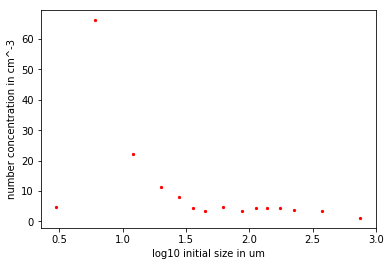

In [13]:
# Plot 1: Number concentration
NaCl_con = 80.0/1000; # 80.0 mmol/L converted to mol/L for saliva, from Kallapur et al.
sizeclass = [3,6,12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750] # in um
numcon = [4.59,66.21,22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11] # in cm^-3
#sizeclass = [12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750,1500] # in um
#numcon = [22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11,0.00] # in cm^-3
t_settle = []
for binnum in range(15):
    size = sizeclass[binnum]
    count = numcon[binnum]
    settling_time = settle.settling_time(T,RH,size,NaCl_con,1.5,model='empirical_big')
logsize = np.log10(sizeclass)
plt.scatter(logsize, numcon, color=c, s=5)
plt.xlabel("log10 initial size in um")
plt.ylabel("number concentration in cm^-3")
savetxt('sizedist.csv', [logsize,numcon], delimiter=',') # equilibrium diameter in um

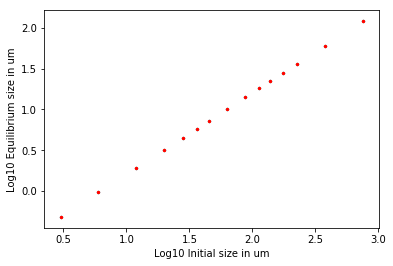

In [14]:
# Plot 2: T on equilibrium size

NaCl_con = 80.0/1000; # 80.0 mmol/L converted to mol/L for saliva, from Kallapur et al.
sizeclass = [3,6,12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750] # in um
numcon = [4.59,66.21,22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11] # in cm^-3
#sizeclass = [12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750,1500] # in um
#numcon = [22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11,0.00] # in cm^-3
t_settle = []

T_range = [5.0,10,15,20,25,30,35]
RH_range = [10,20,30,40,50,60,70,80,90,100]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(T_range)))
T_sizeeq_output = []

for condT in range(len(T_range)): # Study the effect of varying temperature with fixed RH at 50% 
    T = T_range[condT]
    RH = 50
    
    for binnum in range(15):
        size = sizeclass[binnum]
        r_eq = 10**6 * settle.kohler(T, RH, size, NaCl_con)
        c = colors[condT]
        plt.scatter(np.log10(size), np.log10(2*r_eq), color=c, s=5, label=str(T))
        T_sizeeq_output.append([T,RH,size,2*r_eq])
        
plt.xlabel("Log10 Initial size in um")
plt.ylabel("Log10 Equilibrium size in um")
savetxt('T_eqsize.csv', T_sizeeq_output, delimiter=',') # equilibrium diameter in um


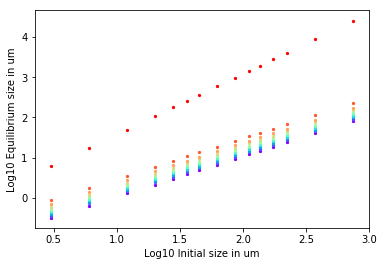

In [15]:
# Plot 3: RH on equilibrium size
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(RH_range)))
RH_sizeeq_output = []

for condRH in range(len(RH_range)): # Study the effect of varying RH with fixed T at 25 C
    T = 25
    RH = RH_range[condRH]
    c = colors[condRH]
    for binnum in range(15):
        size = sizeclass[binnum]
        r_eq = 10**6 * settle.kohler(T, RH, size, NaCl_con)
        c = colors[condRH]
        plt.scatter(np.log10(size), np.log10(2*r_eq), color=c, s=5, label=str(RH))
        RH_sizeeq_output.append([T,RH,size,2*r_eq])

plt.xlabel("Log10 Initial size in um")
plt.ylabel("Log10 Equilibrium size in um")
savetxt('RH_eqsize.csv', RH_sizeeq_output, delimiter=',') # equilibrium diameter in um

0.4814121494485196 13.907254374219056
0.96375235069356 18.131832615773078
1.928434097144372 21.078588795961263
3.2146768443247913 11.029578604638079
4.500919694066306 5.127246119026443
5.787162578002192 2.7735016220855404
7.234185840597769 1.6132839571259279
10.047842209205534 0.6080101170590141
14.067351330474567 0.25172591092963004
18.086860462689074 0.13668002847231786
22.10636959987895 0.08564533805453083
28.135633310328213 0.049700662782909674
36.174651595280956 0.02862428968382679
60.291706461085425 0.009637428535043329
120.584343642359 0.002294440723329664
0.48139428407602025 13.907103558046284
0.9637344504815131 18.131680667798587
1.928416179487021 21.078667088846878
3.21465891968456 11.029703713850088
4.500901766432577 5.127295564612581
5.787144648705185 2.77352264824434
7.234167910136378 1.613293567631181
10.047824277439965 0.6080131184480883
14.067333397750751 0.2517267126250856
18.08684252943288 0.13668034950866714
22.10635166628393 0.08564549735704073
28.13561537640653 0.0

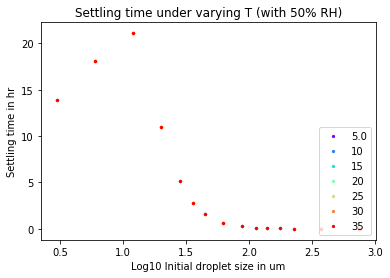

In [4]:
#Plot 4: T on Settling time
mode_to_test = 'speaking' # enter 'speaking','coughing', or 'breathing'

T_range = [5.0,10,15,20,25,30,35]
RH_range = [10,20,30,40,50,60,70,80,90,100]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(T_range)))

for condT in range(len(T_range)): # Study the effect of varying temperature with fixed RH at 50% 
    T = T_range[condT]
    RH = 50
    if mode_to_test == 'speaking':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.speaking(T,RH)
    elif mode_to_test == 'coughing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.coughing(T,RH)
    elif mode_to_test == 'breathing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.breathing(T,RH)
    c = colors[condT]
    plt.scatter(np.log10(sizeclass), t_settle, color=c, s=5, label=str(T))
#label_list = [str(x) for x in T_range]
plt.title("Settling time under varying T (with 50% RH)")
plt.xlabel('Log10 Initial droplet size in um')
plt.ylabel('Settling time in hr')

#plt.legend(label_list)
plt.legend(loc="lower right")
plt.show()

0.3229714740648227 12.612838867279692
0.64623547707339 15.334385768246628
1.292763681957489 20.55199516047411
2.154801350371144 19.75708054710371
3.0168390339479503 12.494102487045026
3.8788767225796557 7.30321134918673
4.8486691249758715 4.277982729809239
6.734376577726487 1.9173922882605443
9.428244370807946 0.8615869369948376
12.122112165507195 0.36776241625188083
14.815979960941823 0.22131904813255926
18.85678165478316 0.12387305140471942
24.244517247215086 0.0694005521789267
40.407724026128754 0.02253792592011806
80.81574097589028 0.005231748285325515
0.36383569081890005 12.937907543491422
0.7280897425678251 16.060984101945564
1.4565982072047161 21.31504362927433
2.427942939148289 17.554618590911364
3.3992876986334846 9.814788797873362
4.370632467300388 5.504146409656362
5.463395336928759 3.1935336720414096
7.588212034497118 1.4386907101120547
10.623664465839257 0.5219620355271922
13.659116900120072 0.27101748244795615
16.694569335736677 0.16547732282938024
21.24774799041388 0.093

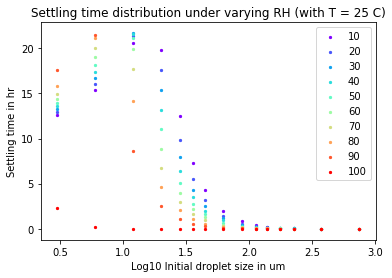

In [5]:
#Plot 5: RH on Settling time
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(RH_range)))

for condRH in range(len(RH_range)): # Study the effect of varying RH with fixed T at 25 C
    T = 25
    RH = RH_range[condRH]
    if mode_to_test == 'speaking':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.speaking(T,RH)
    elif mode_to_test == 'coughing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.coughing(T,RH)
    elif mode_to_test == 'breathing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.breathing(T,RH)
    c = colors[condRH]
    plt.scatter(np.log10(sizeclass), t_settle,  color=c, s=5, label=str(RH))

    
plt.title("Settling time distribution under varying RH (with T = 25 C)")
plt.xlabel('Log10 Initial droplet size in um')
plt.ylabel('Settling time in hr')
#plt.legend(label_list)
plt.legend(loc="upper right")
plt.show()


In [ ]:
# Plot 6: T and RH on settling time

TRH_settle_contour = []

for condRH in range(len(RH_range)):
    RH = RH_range[condRH]
    for condT in range(len(T_range)):
        T = T_range[condT]
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.speaking(T,RH)
        TRH_settle_contour.append([T,RH,t_peak])
savetxt('TRH_settlingtime_contour.csv', TRH_settle_contour, delimiter=',')
        

In [ ]:
# Plot 7: T and RH on half-life
TRH_viab_hl = []
for condRH in range(len(RH_range)):
    RH = RH_range[condRH]
    for condT in range(len(T_range)):
        T = T_range[condT]
        decay_rate = viability.kdecay(T,RH,0)
        halflife = math.log(2)/decay_rate
        TRH_viab_hl.append([T,RH,halflife])
savetxt('TRH_viability_contour.csv', TRH_viab_hl, delimiter=',')
    

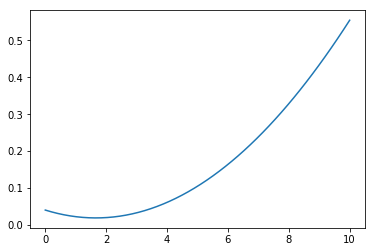

In [11]:
dspan = np.linspace(0,10)
plt.plot(dspan, 0.0077*dspan**2 - 0.0256 * dspan + 0.0405)